In [1]:
from data.utils.lmdb_utils import LMDBDataset

dataset = LMDBDataset('data/graphs/PUBCHEM.lmdb')

In [4]:
print(len(dataset))

632431


In [5]:
all_atomic_nums = []
all_sizes = []
for i in range(len(dataset)):
    try:
        graph, target = dataset[i]
    except:
        graph = dataset[i]
    all_atomic_nums.extend(graph['atom_atomic_nums'].tolist())
    all_sizes.append(graph['atom_atomic_nums'].shape[0])

TypeError: a bytes-like object is required, not 'NoneType'

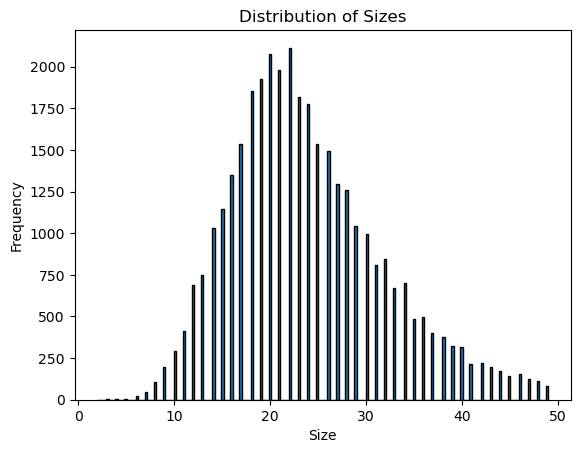

Max size: 49
Min size: 2
Average size: 23.87176966292135


In [10]:
import matplotlib.pyplot as plt

plt.hist(all_sizes, bins=200, edgecolor='black')
plt.title('Distribution of Sizes')
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.show()

print('Max size:', max(all_sizes))
print('Min size:', min(all_sizes))
print('Average size:', sum(all_sizes) / len(all_sizes))

In [18]:
unique = set(all_atomic_nums)
print(len(unique))
for u in unique:
    print(u, all_atomic_nums.count(u))

53
0 4
2 5
4 88
5 617212
6 83280
7 113704
8 5534
10 270
11 1
12 3
13 405
14 1673
15 15572
16 8887
18 27
19 2
21 2
22 1
23 8
24 17
25 53
26 101
27 68
28 89
29 24
30 4
31 25
32 33
33 140
34 1787
39 2
41 14
43 10
44 11
45 39
46 5
49 142
50 8
51 5
52 464
54 1
66 1
73 9
74 2
76 17
77 41
78 6
79 15
80 5
81 7
82 9
88 1
91 2
